# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** [Daffa Dhiya Ulhaq]
- **Email:** [dafhhq01@gmail.com]
- **ID Dicoding:** [MS134D5Y0592]

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1 : Bagaimana pengaruh cuaca dan musim, terhadap jumlah penyewaan sepeda?

- Pertanyaan 2 : Pada cuaca dan musim apa, penyewaan sepeda tertingi dan terendah pada tahun 2011 hingga 2012?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
day_df = pd.read_csv("https://raw.githubusercontent.com/dafhhq01/proyek-analisis-data/main/data/day.csv") #Mengambil file day.csv
day_df.head() #Menampilkan 5 baris utama dari file day.csv

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
hour_df = pd.read_csv("https://raw.githubusercontent.com/dafhhq01/proyek-analisis-data/main/data/hour.csv") #Mengambil file hour.csv
hour_df.head() #Menampilkan 5 baris utama dari file hour.csv

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

Day File

In [4]:
day_df.info() #Melihat ringkasan file

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [5]:
print(day_df.isna().sum()) #Mengecek missing value

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [6]:
print("Mengecek jumlah duplikat: ", day_df.duplicated().sum()) #Mengecek jumlah duplikasi

Mengecek jumlah duplikat:  0


In [7]:
print(day_df.describe()) #Melihat ringkasan statistik

          instant      season          yr        mnth     holiday     weekday  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean   366.000000    2.496580    0.500684    6.519836    0.028728    2.997264   
std    211.165812    1.110807    0.500342    3.451913    0.167155    2.004787   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.500000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    366.000000    3.000000    1.000000    7.000000    0.000000    3.000000   
75%    548.500000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    731.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean     0.683995    1.395349    0.495385    0.474354    0.627894    0.190486   
std      0.465233    0.5448

Hour File

In [8]:
hour_df.info() #Melihat ringkasan file

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [9]:
hour_df.isna().sum() #Mengecek missing value

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [10]:
print("Mengecek jumlah duplikasi: ", hour_df.duplicated().sum()) #Mengecek jumlah duplikasi

Mengecek jumlah duplikasi:  0


In [11]:
hour_df.describe() #Melihat ringkasan statistik

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### Cleaning Data

Day File

In [12]:
datetime_columns = ["dteday"] #Mengganti tipe data dteday

for column in datetime_columns:
  day_df[column] = pd.to_datetime(day_df[column])

In [13]:
day_df.info() #Melihat ringkasan file

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

Hour File

In [14]:
datetime_columns = ["dteday"] #Mengganti tipe data dteday

for column in datetime_columns:
  hour_df[column] = pd.to_datetime(hour_df[column])

In [15]:
hour_df.info() #Melihat ringkasan file

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

## Exploratory Data Analysis (EDA)

### Explore ...

Day File

In [16]:
day_df.describe(include="all") #Melihat statistik

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


In [17]:
#Membuat data frame baru untuk melihat suhu dalam celcius
day_df['temp_real'] = day_df['temp'] * 41  # Suhu dalam °C

In [18]:
print(day_df['temp_real']) #

0      14.110847
1      14.902598
2       8.050924
3       8.200000
4       9.305237
         ...    
726    10.420847
727    10.386653
728    10.386653
729    10.489153
730     8.849153
Name: temp_real, Length: 731, dtype: float64


In [19]:
#Penyewaan sepeda berdasarkan musim
day_df.groupby(by="season").agg({
    "instant": "nunique",
    "cnt": ["min", "max", "mean", "std"]
})

instant   cnt                                
       nunique   min   max         mean          std
season                                              
1          181   431  7836  2604.132597  1399.942119
2          184   795  8362  4992.331522  1695.977235
3          188  1115  8714  5644.303191  1459.800381
4          178    22  8555  4728.162921  1699.615261

In [20]:
#Jumlah penyewaan sepeda berdasarkan hari libur
day_df.groupby(by="holiday").agg({
    "instant": "nunique",
    "cnt": "sum"
})

,instant,cnt
holiday,,
0,710,3214244
1,21,78435


In [21]:
#Jumlah penyewaan berdasarkan cuaca
day_df.groupby(by="weathersit").cnt.sum().sort_values(ascending=False)

,cnt
weathersit,
1,2257952
2,996858
3,37869


In [22]:
#Penyewaan sepeda berdasarkan suhu
day_df.groupby(by="temp_real").cnt.sum().sort_values(ascending=False)

,cnt
temp_real,
23.130847,26439
26.035000,26012
26.615847,24216
21.080847,22963
29.144153,22806
...,...
8.883347,683
15.952731,623
15.437402,605


In [23]:
#Membuat data frame baru untuk melihat selisih penyewa terdaftar
day_df['selisih_registered'] = day_df['registered'] - day_df['casual']   #Selisish penyewa terdaftar

In [24]:
day_df.groupby(by="instant").agg({
    "registered": "sum",
    "casual": "sum",
    "selisih_registered": "sum",
    "cnt": "sum"
})

,registered,casual,selisih_registered,cnt
instant,,,,
1,654,331,323,985
2,670,131,539,801
3,1229,120,1109,1349
4,1454,108,1346,1562
5,1518,82,1436,1600
...,...,...,...,...
727,1867,247,1620,2114
728,2451,644,1807,3095
729,1182,159,1023,1341


In [25]:
day_df.groupby(by=["weathersit", "season"]).cnt.sum().sort_values(ascending=False) #Pengaruh cuaca dan musim terhadap jumlah penyewaan

weathersit  season
1           3         799443
            2         626986
            4         519487
            1         312036
2           4         302510
            2         288096
            3         250679
            1         155573
3           4          19616
            3          11007
            1           3739
            2           3507
Name: cnt, dtype: int64

Hour File

In [26]:
hour_df.describe(include="all") #Melihat statistik

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


In [27]:
#Membuat data frame baru untuk melihat suhu dalam celcius
hour_df['temp_real'] = hour_df['temp'] * 41  # Suhu dalam °C

In [28]:
print(hour_df['temp_real'])

0         9.84
1         9.02
2         9.02
3         9.84
4         9.84
         ...  
17374    10.66
17375    10.66
17376    10.66
17377    10.66
17378    10.66
Name: temp_real, Length: 17379, dtype: float64


In [29]:
#Penyewaan sepeda berdasarkan musim
hour_df.groupby(by="season").agg({
    "instant": "nunique",
    "cnt": ["min", "max", "mean", "std"]
})

instant cnt                             
       nunique min  max        mean         std
season                                         
1         4242   1  801  111.114569  119.224010
2         4409   1  957  208.344069  188.362473
3         4496   1  977  236.016237  197.711630
4         4232   1  967  198.868856  182.967972

In [30]:
#Jumlah penyewaan sepeda berdasarkan hari libur
hour_df.groupby(by="holiday").agg({
    "instant": "nunique",
    "cnt": "sum"
})

,instant,cnt
holiday,,
0,16879,3214244
1,500,78435


In [31]:
#Jumlah penyewaan berdasarkan cuaca
hour_df.groupby(by="weathersit").cnt.sum().sort_values(ascending=False)

,cnt
weathersit,
1,2338173
2,795952
3,158331
4,223


In [32]:
#Penyewaan sepeda berdasarkan suhu
hour_df.groupby(by="temp_real").cnt.sum().sort_values(ascending=False)

,cnt
temp_real,
28.70,177298
29.52,163449
30.34,161587
27.06,156204
26.24,154985
24.60,149905
25.42,148185
31.16,135660
22.96,123756


In [33]:
#Jumlah penyewaan berdasarkan jam
hour_df.groupby(by="hr").cnt.sum().sort_values(ascending=False)

,cnt
hr,
17,336860
18,309772
8,261001
16,227748
19,226789
13,184919
12,184414
15,183149
14,175652


In [34]:
#Membuat data frame baru untuk melihat selisih penyewa terdaftar
hour_df['selisih_registered'] = hour_df['registered'] - hour_df['casual']   #Selisish penyewa terdaftar

In [35]:
#Melihat selisih
hour_df.groupby(by="instant").agg({
    "registered": "sum",
    "casual": "sum",
    "selisih_registered": "sum",
    "cnt": "sum"
})

,registered,casual,selisih_registered,cnt
instant,,,,
1,13,3,10,16
2,32,8,24,40
3,27,5,22,32
4,10,3,7,13
5,1,0,1,1
...,...,...,...,...
17375,108,11,97,119
17376,81,8,73,89
17377,83,7,76,90


In [36]:
hour_df.groupby(by=["weathersit", "season"]).cnt.sum().sort_values(ascending=False) #Pengaruh cuaca dan musim terhadap jumlah penyewaan

weathersit  season
1           3         801941
            2         664463
            4         546491
            1         325278
2           4         251452
            3         212932
            2         207363
            1         124205
3           2          46763
            3          46256
            4          43670
            1          21642
4           1            223
Name: cnt, dtype: int64

## Visualization & Explanatory Analysis

### Pertanyaan 1:

Bagaimana pengaruh cuaca dan musim, terhadap jumlah penyewaan sepeda?

In [37]:
jumlah_perhari_df = day_df.groupby(['season', 'weathersit']).agg({
    "instant": "nunique",
    "cnt": "sum"
})

jumlah_perhari_df

instant     cnt
season weathersit                 
1      1               111  312036
       2                66  155573
       3                 4    3739
2      1               113  626986
       2                68  288096
       3                 3    3507
3      1               136  799443
       2                48  250679
       3                 4   11007
4      1               103  519487
       2                65  302510
       3                10   19616

Visualisasi data

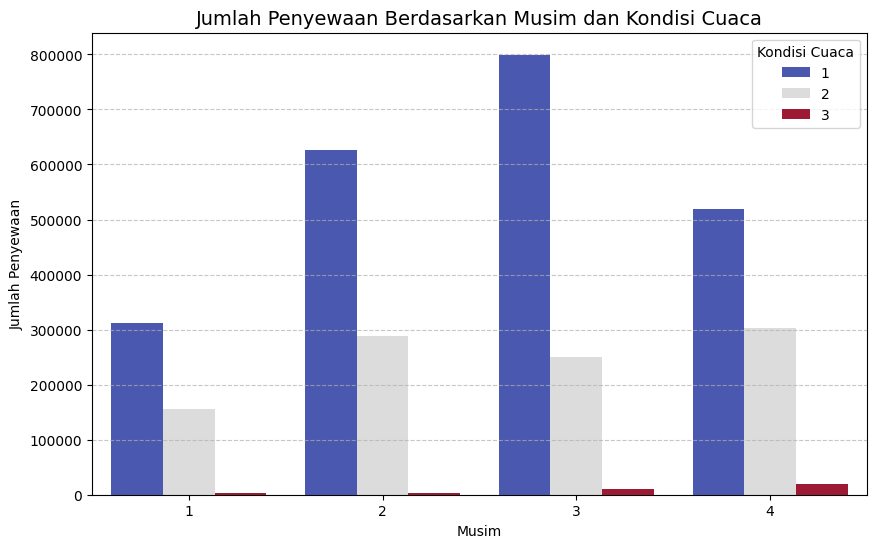

In [38]:
jumlah_perhari_df = day_df.groupby(['season', 'weathersit']).agg({
    "instant": "nunique",
    "cnt": "sum"
}).reset_index()

jumlah_perhari_df.rename(columns={
    "instant": "order_count",
    "cnt": "penyewaan"
}, inplace=True)

plt.figure(figsize=(10, 6))
sns.barplot(data=jumlah_perhari_df, x="season", y="penyewaan", hue="weathersit", palette="coolwarm")

plt.title("Jumlah Penyewaan Berdasarkan Musim dan Kondisi Cuaca", fontsize=14)
plt.xlabel("Musim")
plt.ylabel("Jumlah Penyewaan")
plt.legend(title="Kondisi Cuaca")
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


### Pertanyaan 2:

Pada cuaca dan musim apa, penyewaan sepeda tertingi dan terendah pada tahun 2011 hingga 2012?

In [39]:
#Menambahkan kolom dteday ke year
day_df["year"] = day_df["dteday"].dt.year


jumlah_perhari_df = day_df.groupby(['year', 'season', 'weathersit']).agg({
    "instant": "nunique",
    "cnt": "sum"
}).reset_index()

#Mengubah nama kolom
jumlah_perhari_df.rename(columns={
    "instant": "order_count",
    "cnt": "penyewaan"
}, inplace=True)

jumlah_perhari_df

,year,season,weathersit,order_count,penyewaan
0,2011,1,1,56,99535
1,2011,1,2,32,49336
2,2011,1,3,2,1129
3,2011,2,1,52,220323
4,2011,2,2,38,124513
5,2011,2,3,2,2480
6,2011,3,1,66,309150
7,2011,3,2,25,103952
8,2011,3,3,3,6548
9,2011,4,1,52,206059


Visualisasi data

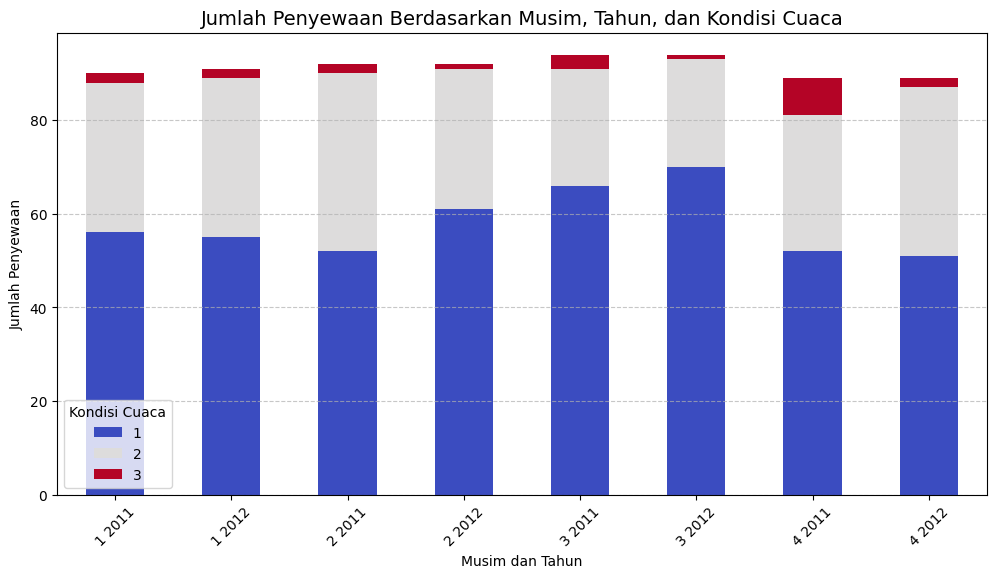

In [40]:
day_df["year"] = day_df["dteday"].dt.year

jumlah_perhari_df = day_df.groupby(['year', 'season', 'weathersit']).agg({
    "instant": "nunique",
    "cnt": "sum"
}).reset_index()

jumlah_perhari_df.rename(columns={
    "instant": "order_count",
    "cnt": "penyewaan"
}, inplace=True)

jumlah_perhari_df["season_year"] = jumlah_perhari_df["season"].astype(str) + " " + jumlah_perhari_df["year"].astype(str)

pivot_df = jumlah_perhari_df.pivot_table(index="season_year", columns="weathersit", values="order_count", aggfunc="sum")

pivot_df.plot(kind="bar", stacked=True, figsize=(12, 6), colormap="coolwarm")

plt.title("Jumlah Penyewaan Berdasarkan Musim, Tahun, dan Kondisi Cuaca", fontsize=14)
plt.xlabel("Musim dan Tahun")
plt.ylabel("Jumlah Penyewaan")
plt.xticks(rotation=45)
plt.legend(title="Kondisi Cuaca")
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


In [41]:
day_df.to_csv("day_df.csv", index=False) #Menyimpan semua data ke day_df.csv

## Analisis Lanjutan (Opsional)

## Conclusion

- Conclution pertanyaan 1 :

Analisis data ini bertujuan untuk mengetahui pengaruh cuaca dan musim terhadap jumlah penyewaan sepeda.

Berdasarkan nalisis yang telah dilakukan ditemukan hasil bahwa kondisi cuaca dan musim sangat berpengaruh dalam jumlah penyewaan sepeda.

Pada cuaca 1 (Cerah, Sedikit Awan, Berawan Sebagian) jumlah penyewaan sangat banyak berbeda dengan kondisi cuaca 2 (Kabut + Berawan, Kabut + Awan pecah, Kabut + Sedikit awan, Kabut) 3 (Salju Ringan, Hujan Ringan + Badai Petir + Awan berserakan, Hujan Ringan + Awan berserakan) dan kondisi cuaca 4 (Hujan Lebat + Palet Es + Badai Petir + Kabut, Salju + Kabut), begitu juga dengan musim.

Kesimpulannya pengaruh kondisi cuaca dan musim sangat berpengaruh terhadap jumlah penyewaan sepeda

- Conclution pertanyaan 2


Analisis data ini bertujuan untuk mengetahui pada musim apa dan kondisi cuaca apa penyewaan sepeda tertinggi terjadi.

Berdasarkan nalisis yang telah dilakukan ditemukan hasil bahwa kondisi cuaca dan musim sangat berpengaruh dalam jumlah penyewaan sepeda dan ternyata kondisi cuaca dan musim ini sangat berbeda beda pengaruhnya pada setiap tahun.

Pada cuaca 1 (Cerah, Sedikit Awan, Berawan Sebagian) jumlah penyewaan sangat banyak berbeda dengan kondisi cuaca 2 (Kabut + Berawan, Kabut + Awan pecah, Kabut + Sedikit awan, Kabut) 3 (Salju Ringan, Hujan Ringan + Badai Petir + Awan berserakan, Hujan Ringan + Awan berserakan) dan kondisi cuaca 4 (Hujan Lebat + Palet Es + Badai Petir + Kabut, Salju + Kabut), begitu juga dengan musim ditemukan data bahwa kebanyakan penyewaan sepeda terjadi pada musim gugur.

Kesimpulannya pengaruh kondisi cuaca dan musim sangat berpengaruh terhadap jumlah penyewaan sepeda. jumlah penyewaan sepeda tertinggi terjadi saat musim gugur dengan kondisi cuaca 1 (Cerah, Sedikit Awan, Berawan Sebagian)